In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Load the zomato.csv dataset
zomato_data = pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/zomato.csv", encoding='ISO-8859-1')

# Load the Country-Code.xlsx dataset
country_code_data = pd.read_excel("https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx")

# Check the structure of the zomato dataset
zomato_data.head()

# Check the structure of the country code dataset
country_code_data.head()

# Merge the zomato dataset with the country code dataset using the 'Country Code' column
data = pd.merge(zomato_data, country_code_data, how='left', left_on='Country Code', right_on='Country Code')

data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


The data has 9551 rows × 22 columns

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [5]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [6]:
data.shape

(9551, 22)

data has 9551 rows × 22 columns out of which 1 is target and remaining are independent variable

In [7]:
data.columns
data.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

Data type is object,int64 and float

In [11]:
#checking the null values
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There area no null values in the data frame

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<AxesSubplot:>

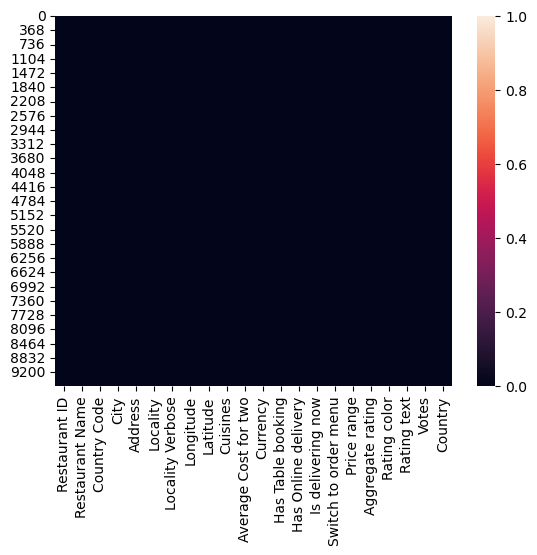

In [13]:
import seaborn as sns
sns.heatmap(data.isnull())

In [ ]:
As there is single colour so there is no null values as seen above also

In [14]:
# to check unique vqlues
data['Average Cost for two'].unique()


array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [15]:
data['Cuisines'].nunique()# number of unique values


1825

In [17]:
data['Restaurant Name'].nunique()# number of unique values


7446

In [18]:
data['City'].nunique()# number of unique values

141

In [19]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan    

In [20]:
data["Average Cost for two"].unique()
data.shape[0]


9551

In [21]:
data.loc[data["Average Cost for two"]==" "]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


<AxesSubplot:>

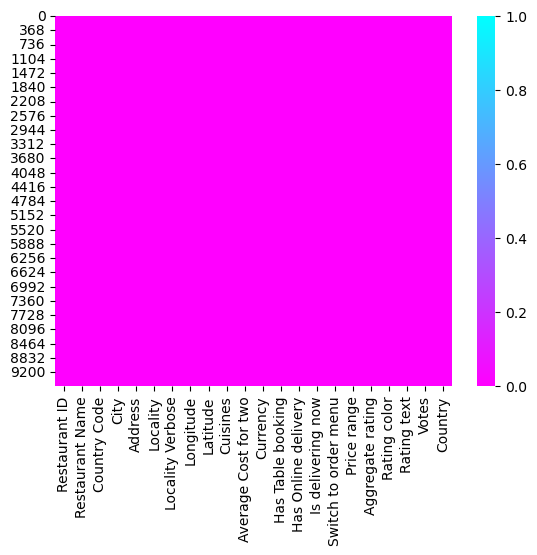

In [33]:
sns.heatmap(data.isnull(),cmap="cool_r")

In [22]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [23]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [24]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [25]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


 data visualization

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64


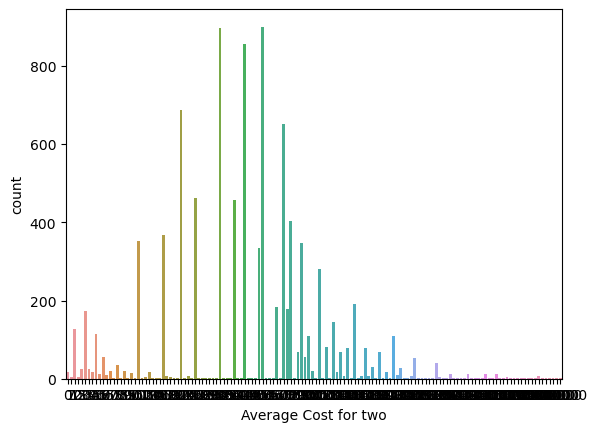

In [26]:

import seaborn as sns

if data["Average Cost for two"].notnull().any():
    sns.countplot(x='Average Cost for two', data=data)
    print(data["Average Cost for two"].value_counts())
else:
    print("The 'Average Cost for two' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

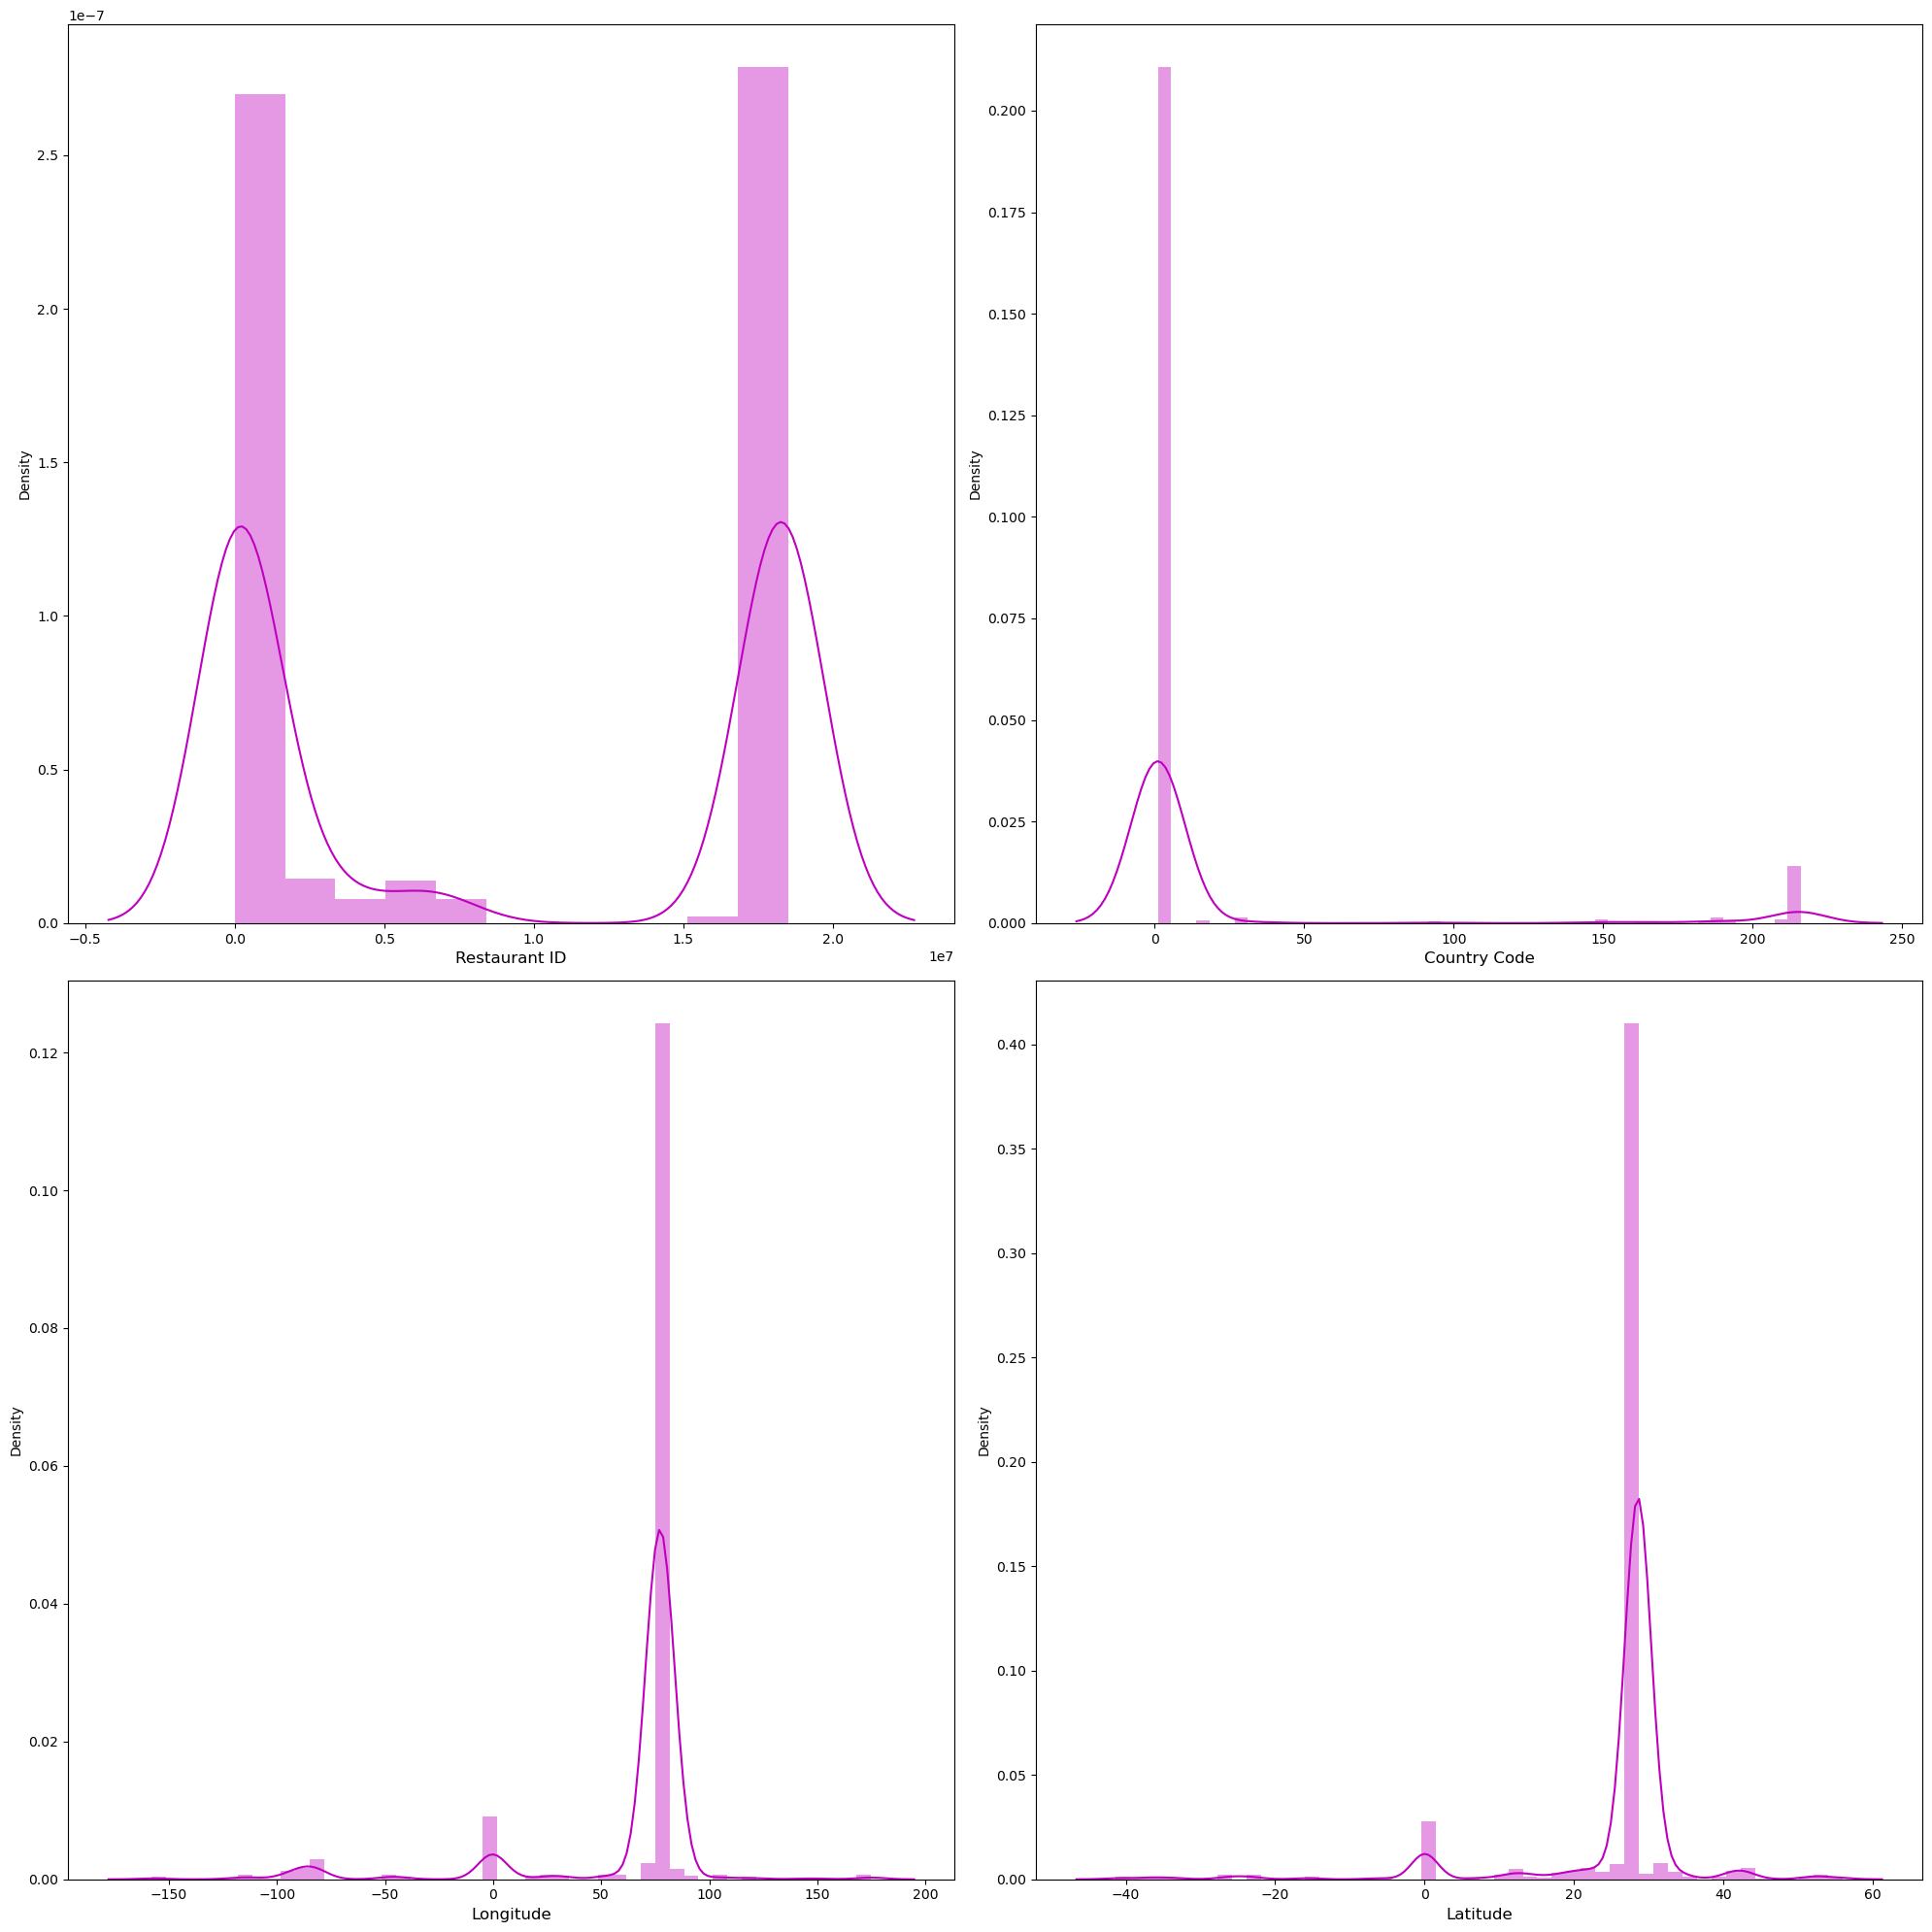

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


skewness is present

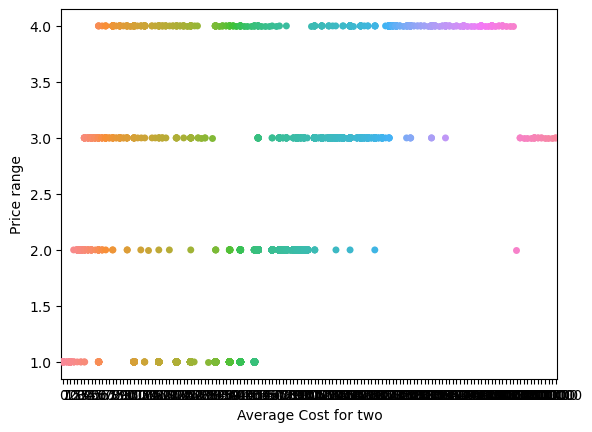

In [28]:
import seaborn as sns
sns.stripplot(x='Average Cost for two', y="Price range",data=data)
plt.show()

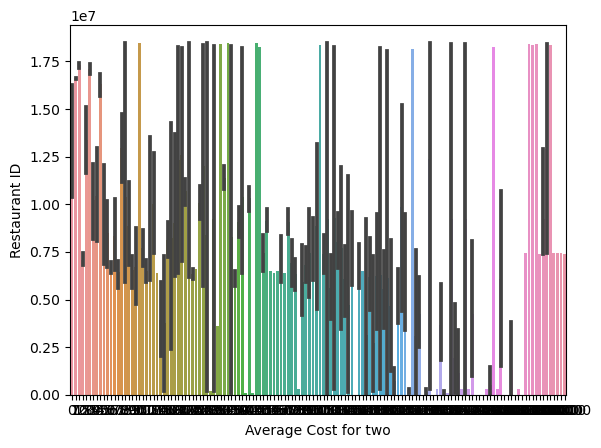

In [32]:
import seaborn as sns
sns.barplot(x='Average Cost for two', y="Restaurant ID",data=data)
plt.show()

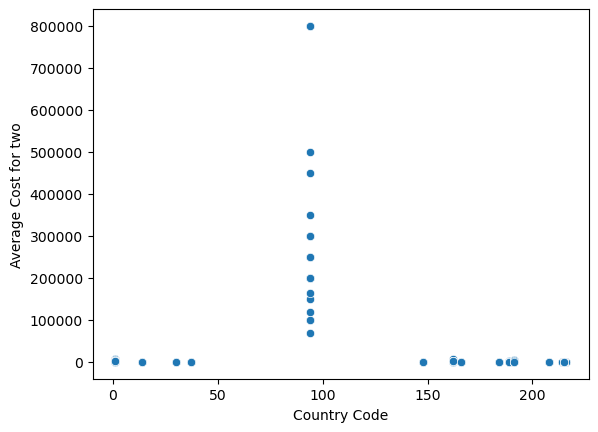

In [31]:
sns.scatterplot(x='Country Code', y="Average Cost for two",data=data)
plt.show()

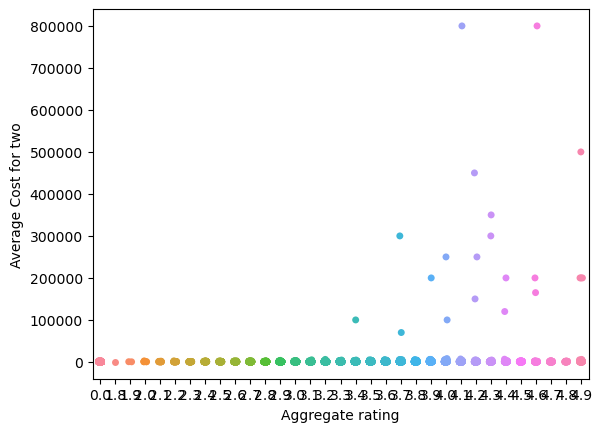

In [34]:
sns.stripplot(x='Aggregate rating', y="Average Cost for two",data=data)
plt.show()

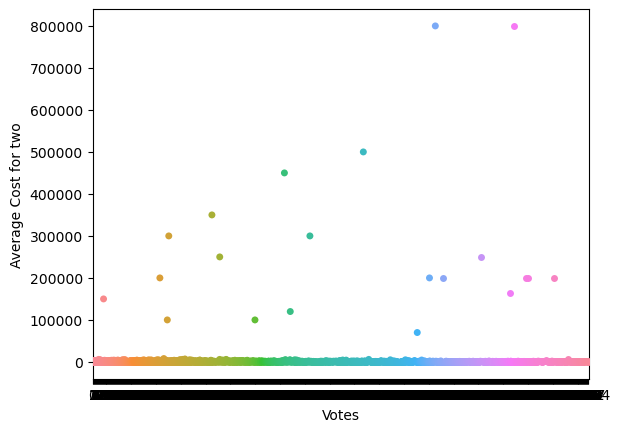

In [35]:
sns.stripplot(x='Votes', y="Average Cost for two",data=data)
plt.show()

Multivariate Analysis

In [36]:
sns.pairplot(data.hue=='Average Cost for two', palette=="Dark2")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'hue'

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

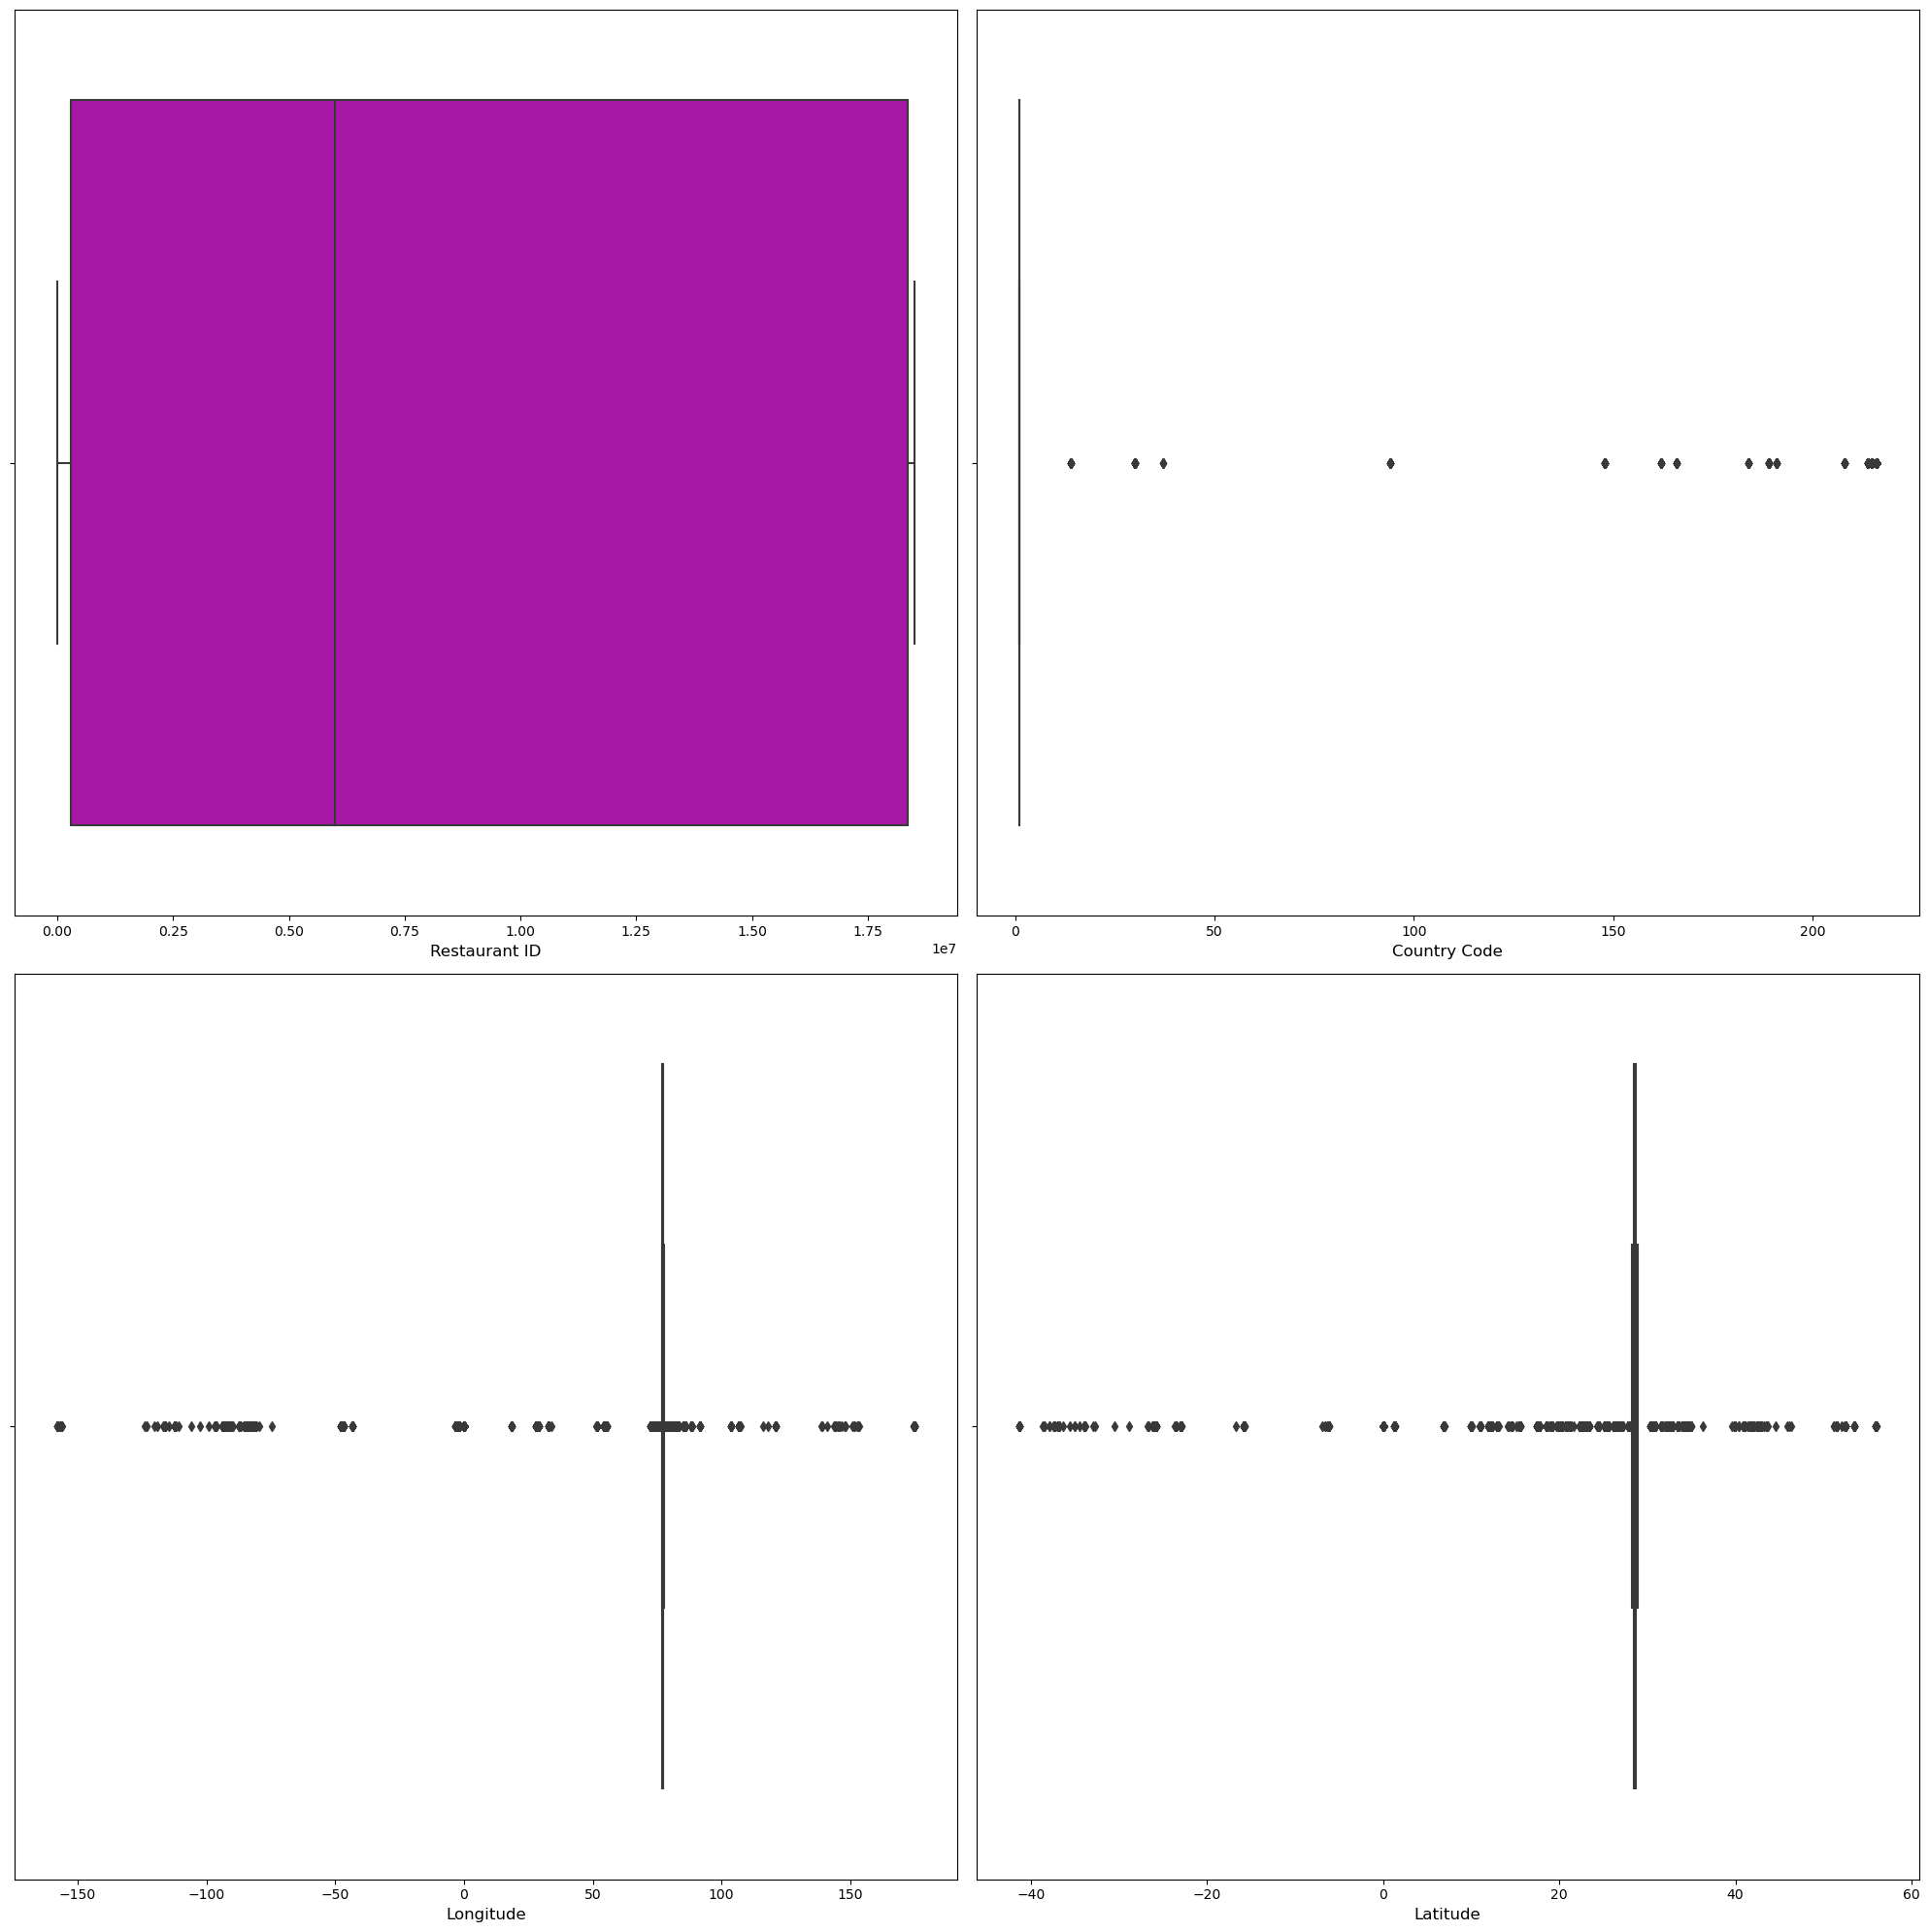

In [37]:
# Checking for outliners using box plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
numerical_columns = ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'] # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+= 1

plt.tight_layout()
plt.show()

In [40]:
import numpy as np
from scipy.stats import zscore

# Specify the columns you want to select
columns = ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

# Select the desired columns from the data DataFrame
out_feature = data[columns]

# Compute the z-scores
z = np.abs(zscore(out_feature))


In [41]:
np.where(z>3)

(array([  22,   23,   24, ..., 9548, 9549, 9550], dtype=int64),
 array([3, 3, 3, ..., 1, 1, 1], dtype=int64))

In [42]:
z.iloc[22,3]

3.780972618520891

In [43]:
#removing the data above z score and ceating new data frame
data1=data[(z<3).all(axis=1)]
data1.shape

(8565, 22)

In [44]:
print("data loss percentage:-",((data.shape[0])-data1.shape[0])/100)

data loss percentage:- 9.86


In [45]:
data.skew()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6976\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [46]:
data1.skew()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6976\2517516131.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Restaurant ID            0.117936
Country Code            11.593933
Longitude               -3.529965
Latitude                -3.180873
Average Cost for two     3.718671
Price range              1.029231
Aggregate rating        -0.877262
Votes                    3.653843
dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


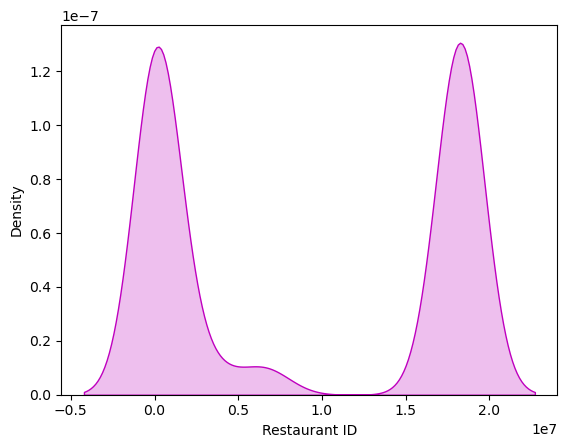

In [47]:
sns.distplot(data["Restaurant ID"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


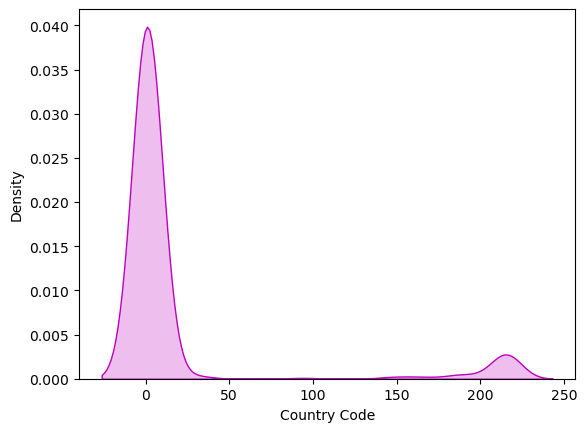

In [48]:
sns.distplot(data["Country Code"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


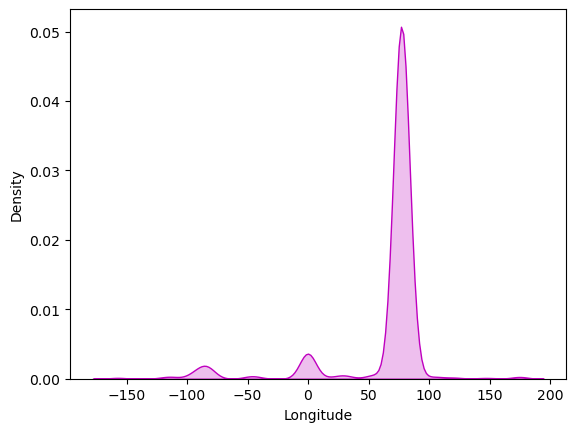

In [49]:
sns.distplot(data["Longitude"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


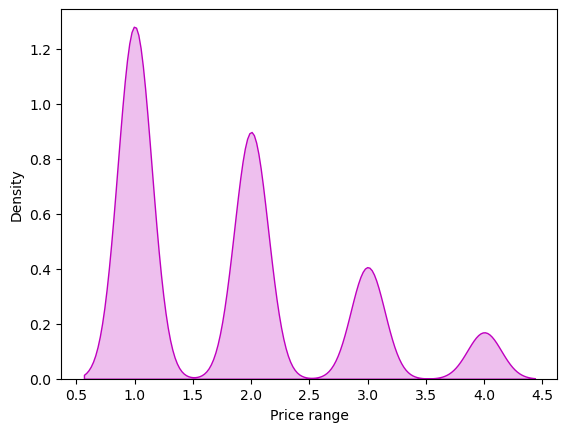

In [51]:
sns.distplot(data["Price range"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

multivaraiate

Encoding Categorical Columns

In [52]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6976\47946823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6976\47946823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i]=OE.fit_transform(data1[i].values.reshape(-1,1))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6976\47946823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8565 entries, 0 to 9436
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8565 non-null   int64  
 1   Restaurant Name       8565 non-null   float64
 2   Country Code          8565 non-null   int64  
 3   City                  8565 non-null   float64
 4   Address               8565 non-null   float64
 5   Locality              8565 non-null   float64
 6   Locality Verbose      8565 non-null   float64
 7   Longitude             8565 non-null   float64
 8   Latitude              8565 non-null   float64
 9   Cuisines              8565 non-null   float64
 10  Average Cost for two  8565 non-null   int64  
 11  Currency              8565 non-null   float64
 12  Has Table booking     8565 non-null   float64
 13  Has Online delivery   8565 non-null   float64
 14  Is delivering now     8565 non-null   float64
 15  Switch to order menu 

In [54]:
data1.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,8.565000e+03,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,8565.000000,...,8565.000000,8565.000000,8565.000000,8565.0,8565.000000,8565.000000,8565.00000,8565.000000,8565.000000,8565.000000
mean,8.801365e+06,3221.416462,2.243316,31.272504,4047.393812,435.068768,454.718272,72.930154,26.354364,723.488149,...,0.124460,0.276357,0.003970,0.0,1.714769,2.505873,3.06258,1.638762,94.151313,0.021600
std,8.954556e+06,1890.117626,14.469084,8.574998,2285.052237,210.281142,226.575646,18.379620,7.104211,399.931587,...,0.330125,0.447222,0.062884,0.0,0.853064,1.508510,1.39025,1.611870,183.495536,0.261361
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.011060e+05,1577.000000,1.000000,35.000000,2076.000000,253.000000,259.000000,77.098634,28.490137,316.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,1.900000,2.00000,0.000000,4.000000,0.000000
50%,2.600472e+06,3165.000000,1.000000,35.000000,4103.000000,442.000000,453.000000,77.203195,28.569510,871.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,3.100000,2.00000,2.000000,24.000000,0.000000
75%,1.836305e+07,4841.000000,1.000000,35.000000,6015.000000,604.000000,639.000000,77.286164,28.638070,1004.000000,...,0.000000,1.000000,0.000000,0.0,2.000000,3.500000,4.00000,3.000000,94.000000,0.000000
max,1.850065e+07,6572.000000,184.000000,54.000000,7947.000000,811.000000,868.000000,174.779441,35.000000,1385.000000,...,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.00000,5.000000,1439.000000,4.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [55]:
corr=data1.corr()
corr

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,1.000000,0.002933,0.038733,0.010785,0.145534,0.090610,0.090699,-0.159271,-0.145940,-0.059961,...,-0.090548,-0.058590,0.014773,NaN,-0.144637,-0.383843,0.153659,0.272974,-0.241443,0.045016
Restaurant Name,0.002933,1.000000,0.011630,0.008530,0.001829,0.008659,0.008637,0.016053,0.012006,0.060831,...,0.041460,0.031505,0.013050,NaN,0.064842,0.028642,-0.007253,0.007538,0.027757,0.007505
Country Code,0.038733,0.011630,1.000000,0.025583,-0.023996,-0.029294,-0.028604,0.100044,-0.160221,-0.020989,...,0.026735,-0.053105,-0.005425,NaN,0.184459,0.086729,-0.066520,0.036052,0.048478,0.973905
City,0.010785,0.008530,0.025583,1.000000,-0.095810,-0.029670,-0.033822,0.036121,0.046024,0.014873,...,-0.002165,-0.017478,-0.023878,NaN,-0.110052,-0.097980,0.067731,-0.055647,-0.092595,0.030770
Address,0.145534,0.001829,-0.023996,-0.095810,1.000000,0.150581,0.152337,-0.017527,0.010502,-0.016180,...,-0.010811,-0.008224,0.029266,NaN,-0.018561,-0.101775,0.056251,0.048478,-0.087433,-0.031028
Locality,0.090610,0.008659,-0.029294,-0.029670,0.150581,1.000000,0.999002,-0.028868,-0.006066,-0.015087,...,-0.070155,-0.049229,-0.011218,NaN,-0.100585,-0.148127,0.006835,-0.000465,-0.143557,-0.031437
Locality Verbose,0.090699,0.008637,-0.028604,-0.033822,0.152337,0.999002,1.000000,-0.029591,-0.006668,-0.016232,...,-0.069131,-0.049567,-0.011166,NaN,-0.097496,-0.147116,0.007440,0.001245,-0.141014,-0.030599
Longitude,-0.159271,0.016053,0.100044,0.036121,-0.017527,-0.028868,-0.029591,1.000000,0.875398,0.019618,...,0.073374,0.135989,0.014528,NaN,0.052978,0.174180,-0.089879,-0.101979,0.100777,0.082816
Latitude,-0.145940,0.012006,-0.160221,0.046024,0.010502,-0.006066,-0.006668,0.875398,1.000000,0.038133,...,0.062544,0.163124,0.020108,NaN,-0.060276,0.077801,-0.043745,-0.157295,-0.015019,-0.164519
Cuisines,-0.059961,0.060831,-0.020989,0.014873,-0.016180,-0.015087,-0.016232,0.019618,0.038133,1.000000,...,0.039859,-0.039823,0.005151,NaN,0.020264,-0.046023,-0.047689,-0.061127,-0.022869,-0.021027


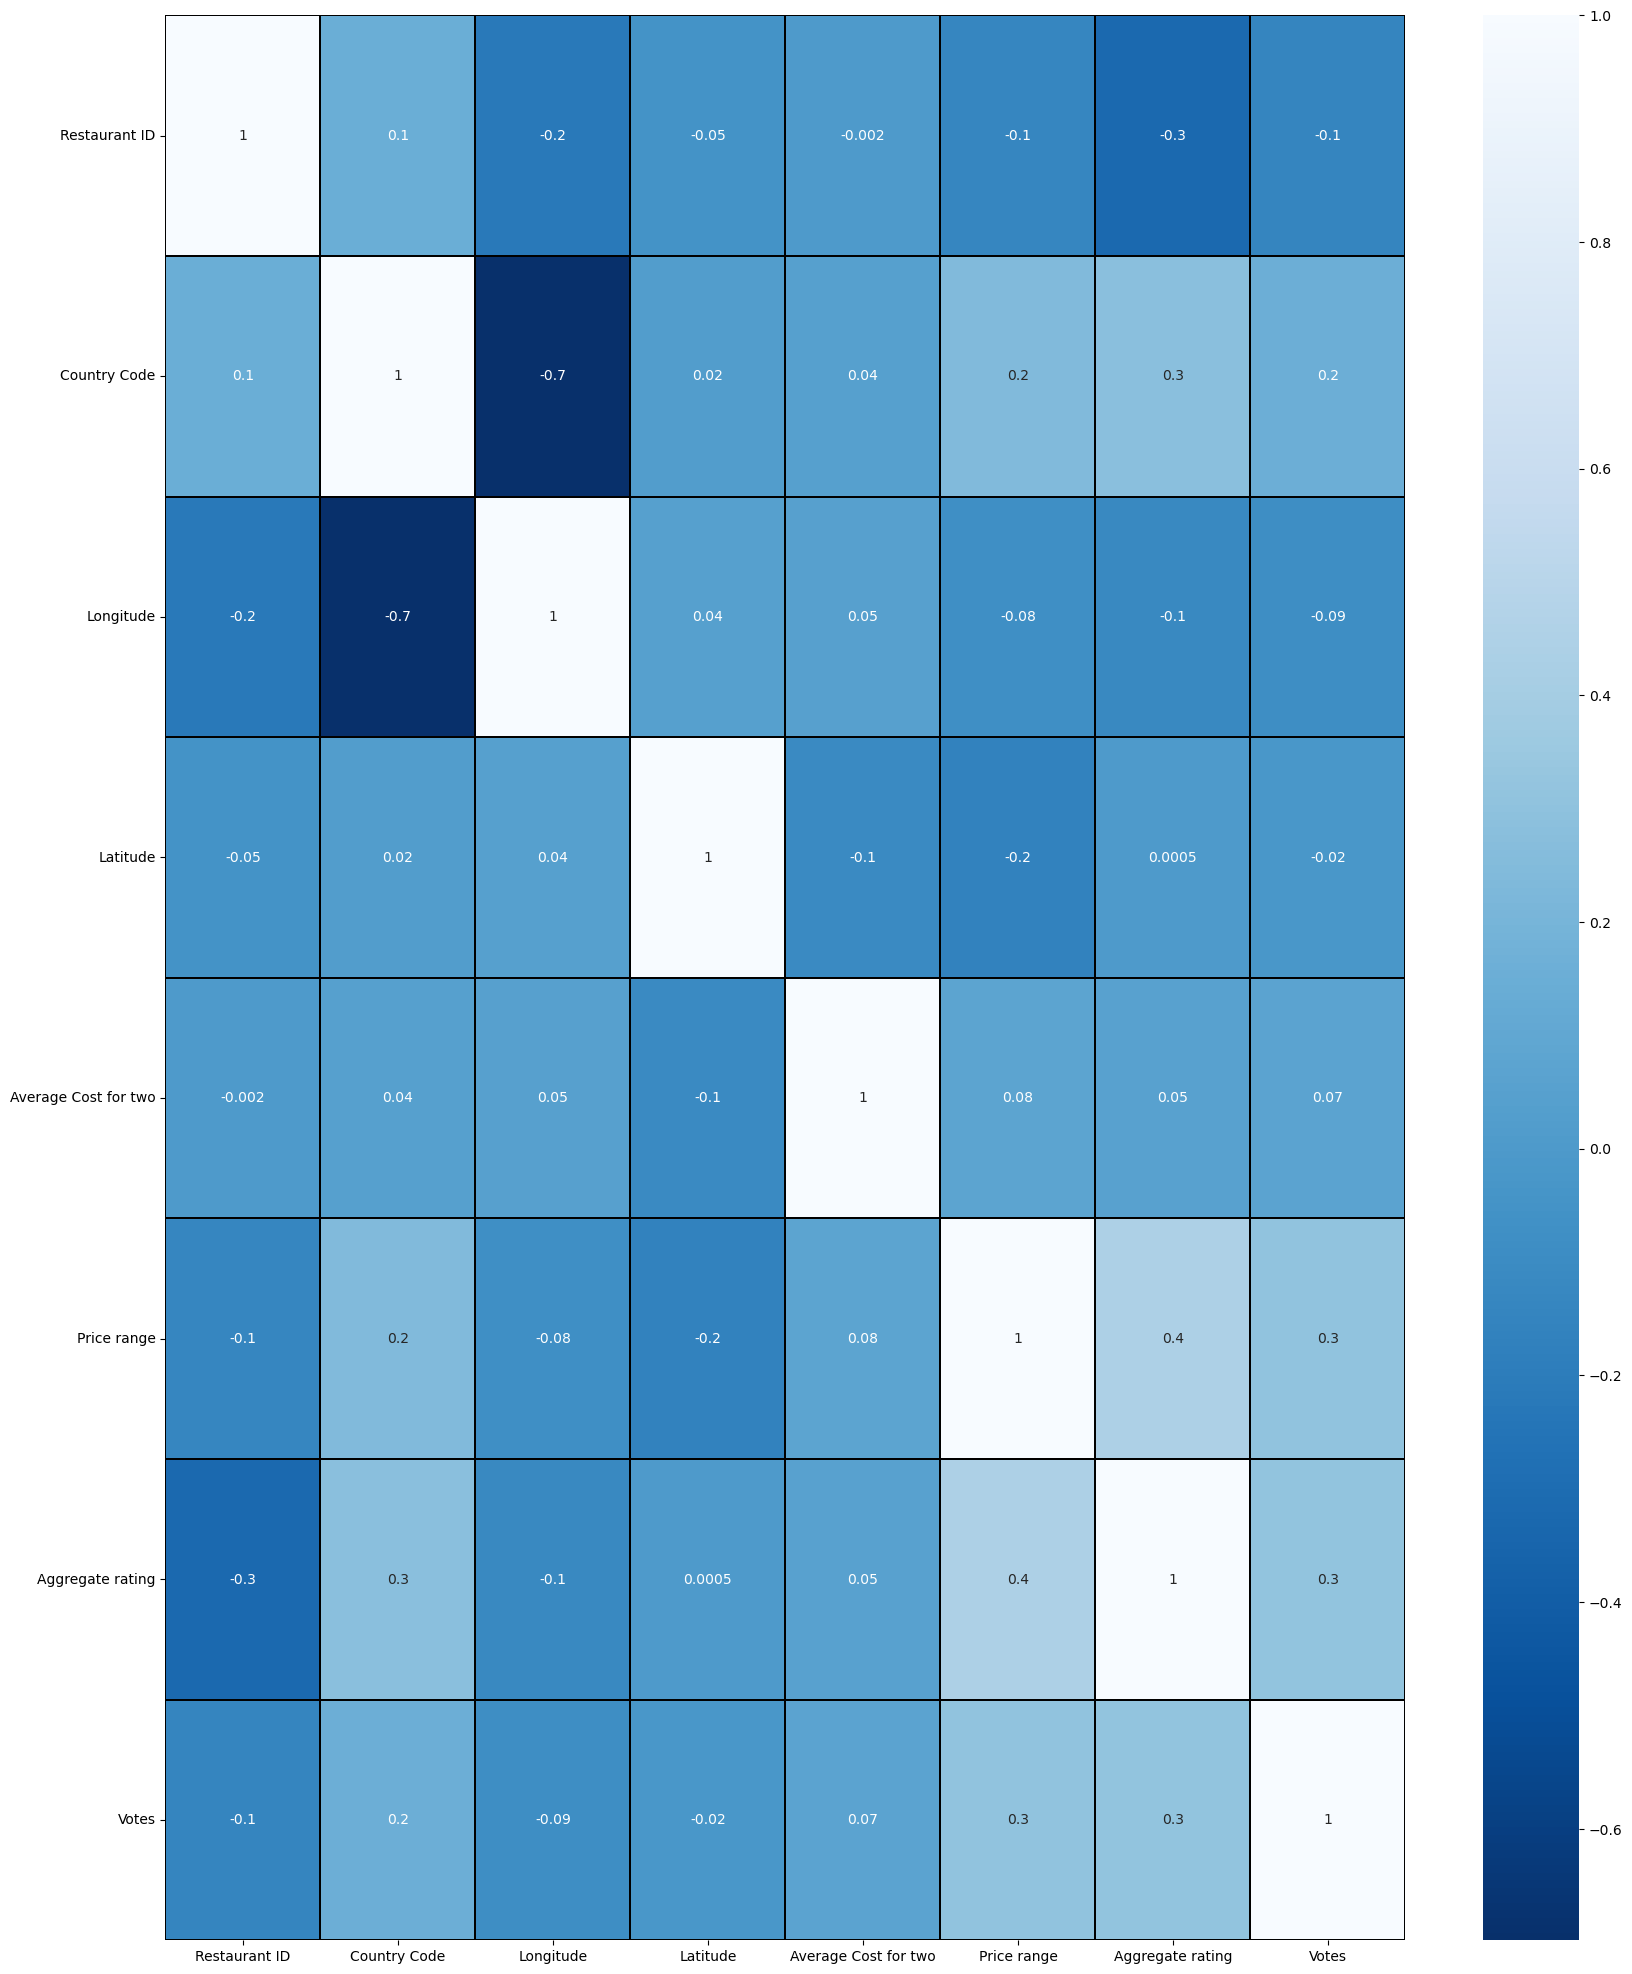

In [56]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. tOTAL VOLUME AND 4225 AND LARGE BAG HAVE POSITIVE CORELATION WITH TARGET. tYPE HAS HIGH CORELATION. 

In [57]:
corr["Average Cost for two"].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.813657
Has Table booking       0.617051
Votes                   0.367577
Aggregate rating        0.329923
Rating text             0.095707
Longitude               0.063703
Has Online delivery     0.062763
Address                 0.054153
Restaurant Name         0.051725
Latitude                0.022753
Is delivering now       0.009316
Country Code            0.006975
Cuisines                0.006327
Country                -0.012355
Rating color           -0.033294
Locality Verbose       -0.038586
Locality               -0.041655
City                   -0.059545
Currency               -0.067872
Restaurant ID          -0.141174
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

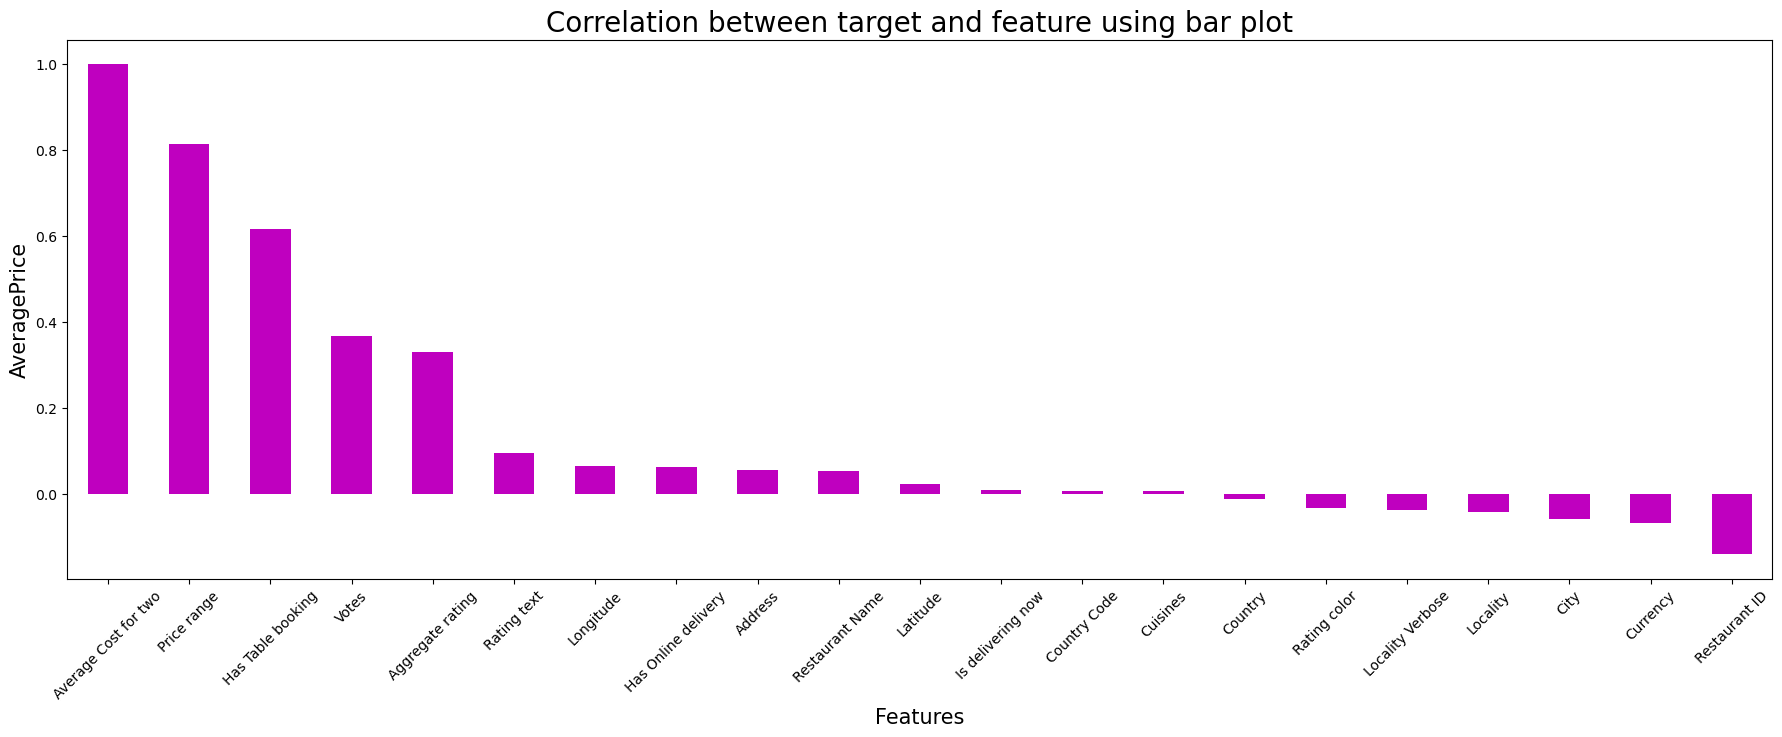

In [58]:
plt.figure(figsize=(22,7), facecolor="white")
data1.corr()["Average Cost for two"].sort_values(ascending=False).drop(["Switch to order menu"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("AveragePrice", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

In [59]:
x=data1.drop("Average Cost for two",axis=1)
y=data1["Average Cost for two"]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,-0.277386,0.052689,11.041889,-0.498280,1.612139,-1.603037,-1.570067,2.617039,-1.659524,-0.166259,...,2.652303,-0.617978,-0.063131,0.0,1.506693,1.520879,-2.203028,-0.396310,1.198185,7.570045
1,-0.278877,-0.226145,11.041889,-0.498280,0.523697,-0.280920,-0.312136,2.616308,-1.661176,0.148814,...,2.652303,-0.617978,-0.063131,0.0,1.506693,1.321996,-2.203028,-0.396310,2.707846,7.570045
2,-0.279356,-0.355245,11.041889,-0.381656,-0.040436,-1.189281,-1.163998,2.618633,-1.657277,1.369094,...,2.652303,-0.617978,-0.063131,0.0,2.679006,1.255701,-1.483690,2.085425,0.958383,7.570045
3,-0.277289,0.491312,11.041889,-0.381656,1.614327,0.541836,0.473520,2.618614,-1.656726,0.176320,...,-0.377031,-0.617978,-0.063131,0.0,2.679006,1.587174,-2.203028,-0.396310,1.476137,7.570045
4,-0.277759,0.876496,11.041889,-0.381656,1.613889,0.541836,0.473520,2.618670,-1.656848,0.173820,...,2.652303,-0.617978,-0.063131,0.0,2.679006,1.520879,-2.203028,-0.396310,0.734931,7.570045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,-0.290304,-0.674292,11.318356,-2.131029,-1.183147,1.340813,1.391589,-1.164592,-0.145148,-0.428819,...,-0.377031,-0.617978,-0.063131,0.0,2.679006,0.924229,1.393658,0.224124,0.560530,11.396391
8561,-0.290398,1.656387,11.318356,-2.131029,-1.405912,1.431174,1.475451,-1.164403,-0.141338,-0.013724,...,-0.377031,-0.617978,-0.063131,0.0,2.679006,1.255701,-1.483690,2.085425,-0.147976,11.396391
8562,1.056489,0.847925,11.318356,-2.131029,0.285615,1.459708,1.501934,-1.165339,-0.151776,1.601647,...,-0.377031,-0.617978,-0.063131,0.0,2.679006,1.189407,-1.483690,2.085425,-0.115276,11.396391
8563,-0.290372,0.545809,11.318356,-2.131029,-0.366050,1.540557,1.585796,-1.163616,-0.152221,-0.011223,...,-0.377031,-0.617978,-0.063131,0.0,2.679006,1.321996,-2.203028,-0.396310,0.277127,11.396391


CHECKING VARIANCE INFLATION(VIF)

In [61]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)


                 Feature         VIF
0          Restaurant ID    1.303557
1        Restaurant Name    1.010016
2           Country Code   22.671666
3                   City    1.087449
4                Address    1.064059
5               Locality  510.276912
6       Locality Verbose  510.242745
7              Longitude    8.653867
8               Latitude    8.877271
9               Cuisines    1.028869
10              Currency    1.639631
11     Has Table booking    1.600633
12   Has Online delivery    1.172011
13     Is delivering now    1.015601
14  Switch to order menu         NaN
15           Price range    1.962320
16      Aggregate rating    2.032584
17          Rating color    1.223290
18           Rating text    1.555681
19                 Votes    1.655790
20               Country   22.484651


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


vif is grater than 10 in date, total volume,4225, year it can be dropped. Date has highest VIF Terefore it is dropped first

In [63]:
# dropping date column
x.drop("Locality Verbose",axis=1,inplace=True)

In [64]:



# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)

                 Feature        VIF
0          Restaurant ID   1.303522
1        Restaurant Name   1.010014
2           Country Code  22.669193
3                   City   1.080711
4                Address   1.062765
5               Locality   1.055623
6              Longitude   8.645223
7               Latitude   8.869079
8               Cuisines   1.028297
9               Currency   1.639631
10     Has Table booking   1.600075
11   Has Online delivery   1.171394
12     Is delivering now   1.015598
13  Switch to order menu        NaN
14           Price range   1.958282
15      Aggregate rating   2.032584
16          Rating color   1.223163
17           Rating text   1.555489
18                 Votes   1.653824
19               Country  22.478501


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [65]:
# dropping date column
x.drop("Switch to order menu",axis=1,inplace=True)

In [66]:
# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Print VIF data
print(vif_data1)

                Feature        VIF
0         Restaurant ID   1.303522
1       Restaurant Name   1.010014
2          Country Code  22.669193
3                  City   1.080711
4               Address   1.062765
5              Locality   1.055623
6             Longitude   8.645223
7              Latitude   8.869079
8              Cuisines   1.028297
9              Currency   1.639631
10    Has Table booking   1.600075
11  Has Online delivery   1.171394
12    Is delivering now   1.015598
13          Price range   1.958282
14     Aggregate rating   2.032584
15         Rating color   1.223163
16          Rating text   1.555489
17                Votes   1.653824
18              Country  22.478501


In [67]:
y.value_counts()

500     890
300     888
400     848
200     677
600     645
       ... 
3650      1
4800      1
720       1
7000      1
160       1
Name: Average Cost for two, Length: 93, dtype: int64

MODELLING

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Select the features (independent variables) and target (dependent variable)
x = data1.iloc[:, :-1]  # All columns except the last one
y = data1['Average Cost for two']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'data1' is your filtered DataFrame

# Define the feature columns 'x'
x=data1.drop("Average Cost for two",axis=1)
y=data1["Average Cost for two"]

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predict = lr.predict(x_test)
    acc = r2_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Maximum r2 score is", maxAcc, "on random state", maxRS)


Maximum r2 score is 0.77718722535422 on random state 124


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lr))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lr)))


R2 score:  0.7552836668754421
R2_score on training data:  72.83225473871182
Mean Absoloute Error:- 165.6501689489156
Mean Squared Error:- 75901.30321806883
Root Mean Squared Error:- 275.50191145991863


In [71]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_RFR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8780517100557995
R2_score on training data:  98.10662958182441
Mean Absoloute Error:- 103.72011673151752
Mean Squared Error:- 37823.52413424125
Root Mean Squared Error:- 194.4827090880864


In [72]:
Knn=knn()
Knn.fit(x_train,y_train)
pred_Knn=Knn.predict(x_test)
pred_train=Knn.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_Knn))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_Knn))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_Knn))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_Knn)))

R2 score:  0.10841585845812396
R2_score on training data:  39.4506943439927
Mean Absoloute Error:- 340.36342412451364
Mean Squared Error:- 276534.0482490272
Root Mean Squared Error:- 525.8650475635619


In [73]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=Knn.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_GBR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_GBR)))

R2 score:  0.10841585845812396
R2_score on training data:  90.8221826539462
Mean Absoloute Error:- 340.36342412451364
Mean Squared Error:- 276534.0482490272
Root Mean Squared Error:- 525.8650475635619


In [74]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_lasso))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_lasso)))

R2 score:  0.7521978642733284
R2_score on training data:  72.73149026645595
Mean Absoloute Error:- 165.48010325365598
Mean Squared Error:- 76858.39682920481
Root Mean Squared Error:- 277.2334698935264


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+08, tolerance: 2.165e+05
  model = cd_fast.enet_coordinate_descent(


In [75]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_rd))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_rd)))

R2 score:  0.7551942145686175
R2_score on training data:  72.83187672485613
Mean Absoloute Error:- 165.61212491577285
Mean Squared Error:- 75929.04777674685
Root Mean Squared Error:- 275.55225961103434


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.08489e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR))

R2_score: 0.7610344568738752


In [77]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_SVR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_SVR)))

R2 score:  -0.04793361662778839
R2_score on training data:  -5.687300284800001
Mean Absoloute Error:- 315.8009411204621
Mean Squared Error:- 325027.45596301707
Root Mean Squared Error:- 570.1117925135535


In [78]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ', r2_score(y_test,pred_ETR))
print('R2_score on training data: ', r2_score(y_train,pred_train)*100)
print('Mean Absoloute Error:-', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:-', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:-', np.sqrt (mean_squared_error(y_test,pred_ETR)))

R2 score:  0.8801846106297746
R2_score on training data:  99.99999138415812
Mean Absoloute Error:- 105.33573929961089
Mean Squared Error:- 37161.98294844358
Root Mean Squared Error:- 192.77443541207322


In [79]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.59945275 0.75233011 0.74008248 0.65089507 0.64251233]
0.6770545467757134
difference between r2 score and cross validation score is - 20.09971632800861


In [80]:

score2=cross_val_score(Knn,x,y)
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score2.mean())*100)

[-0.17926377 -0.06007432 -0.06713061  0.06984139 -0.73112436]
-0.19355033385624426
difference between r2 score and cross validation score is - 107.16020439120437


In [81]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score3.mean())*100)

[0.66794564 0.83379847 0.85576256 0.79873587 0.69765889]
0.7707802859773942
difference between r2 score and cross validation score is - 10.727142407840528


In [67]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score4.mean())*100)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+02, tolerance: 2.279e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+02, tolerance: 2.363e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+01, toleranc

[-3.14100535 -0.54601654  0.07762155 -0.19109535 -0.56342921]
-0.8727849798631148
difference between r2 score and cross validation score is - 167.36698148017118


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+01, tolerance: 1.920e-01
  model = cd_fast.enet_coordinate_descent(


In [82]:

score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score5.mean())*100)

[0.57136421 0.75234631 0.74010998 0.65083272 0.64382953]
0.6716965482774431
difference between r2 score and cross validation score is - 20.635516177835644


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.8076e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.81581e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.83124e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.83115e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlg

In [83]:

score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score6.mean())*100)

[0.50876632 0.67865577 0.71240378 0.74939398 0.62255883]
0.6543557376182528
difference between r2 score and cross validation score is - 22.36959724375467


In [84]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score7.mean())*100)

[-0.13984812 -0.11964384 -0.00226451 -0.05238125 -0.01390328]
-0.06560820005193553
difference between r2 score and cross validation score is - 94.36599101077351


In [71]:

score8=cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('difference between r2 score and cross validation score is -',(r2_score(y_test,pred_RFR)-score8.mean())*100)

[-1.08442032  0.23519988  0.39178823 -0.62486286 -0.08706011]
-0.23387103652990016
difference between r2 score and cross validation score is - 103.47558714684972


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {
    'alpha': [1.0, 0.05, 4.2],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'cbfgs'],
    'positive': [False, True],
    'random_state': [1, 4, 10, 20]
}

ridge = Ridge()
gscv = GridSearchCV(ridge, param, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.60918e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.60206e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.60293e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.60684e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'cbfgs']})

In [86]:
best_params = gscv.best_params_
print(best_params)


{'alpha': 0.05, 'fit_intercept': True, 'positive': False, 'random_state': 1, 'solver': 'auto'}


In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create and fit the Ridge model with the best parameters
model = Ridge(alpha=0.05, fit_intercept=True, positive=False, random_state=1, solver='auto')
model.fit(x_train, y_train)

# Make predictions on the test data
pred = model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('r2_score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

r2_score: 0.755279186456062
Mean Absolute Error: 165.6482966315248
Mean Squared Error: 75902.69286650613
Root Mean Squared Error: 275.5044334788573


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.04245e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [90]:
import joblib
import pickle
import pandas as pd



# Save the model using pickle
filename = "zomato.pkl"
pickle.dump(model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open('zomato.pkl', 'rb'))

# Calculate the score on the test data
result = loaded_model.score(x_test, y_test)
print(result * 100)

# Create a DataFrame for predictions and original values
conclusion = pd.DataFrame({'predicted': loaded_model.predict(x_test), 'original': y_test})
print(conclusion)

75.52791864560619
        predicted  original
5193   713.643956       800
5342   644.452545       700
5126   222.050731       450
2960   639.201873       600
1846  1722.587114      1500
...           ...       ...
7165   247.304757       150
2595   240.596161       150
2808  1108.650408       900
1016    51.475596       300
18     626.885710       600

[2570 rows x 2 columns]
